# Lab 6

#### Joseph Bu

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import random

plt.rcParams["figure.figsize"] = (20,15)

## Setup

### For the LHC data, we are going to have to fake a background. Make a Poisson background with mean 100. 

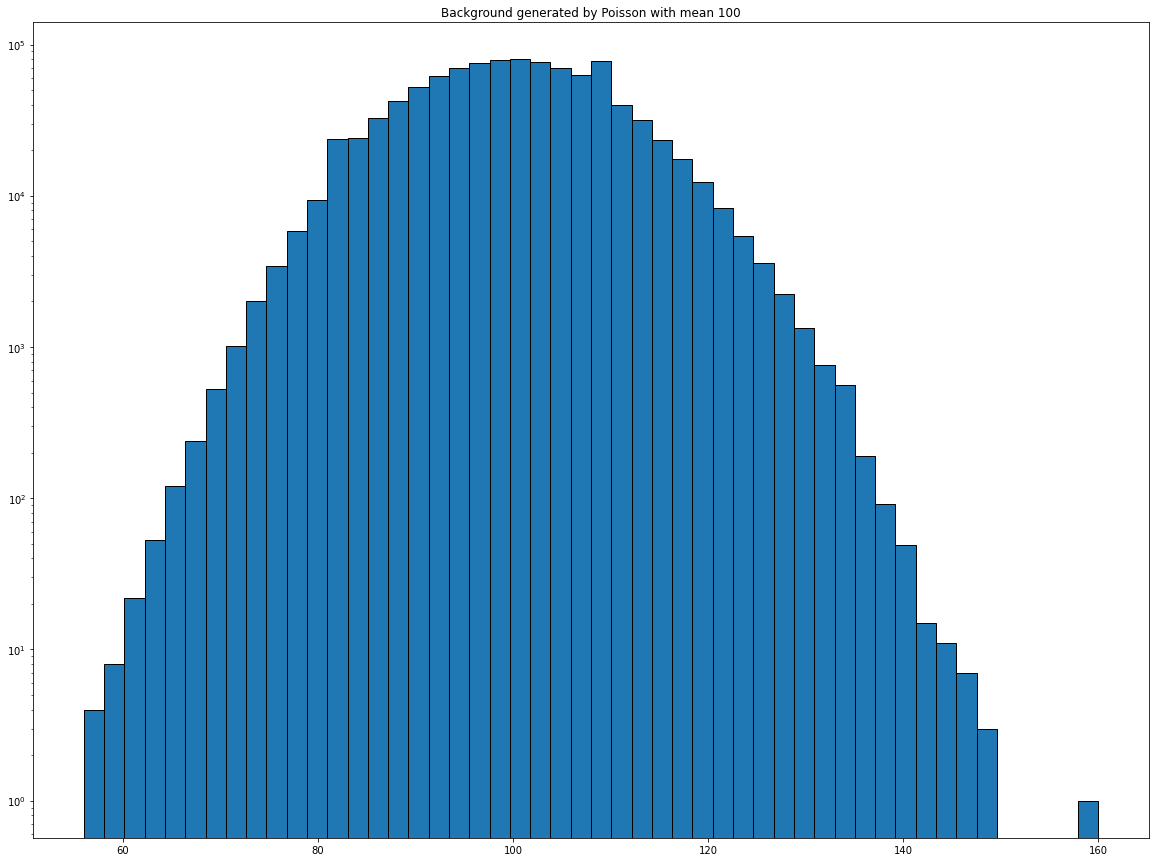

In [4]:
bkgd = stats.poisson.rvs(mu=100, size=1000000)

plt.hist(bkgd, bins=50, edgecolor='black')
plt.title('Background generated by Poisson with mean 100')
plt.yscale('log')

## Problem 1

### The first problem is to look at your background distribution and determine where the 5σ sensitivity threshold is. [Hint, you've done this several times now, look back at the first few labs.]

In [5]:
sig = stats.norm.cdf(5)
threshold = stats.poisson.ppf(sig, 100)
threshold

154.0

So the 5$\sigma$ sensitivity threshold for a background poisson distribution with a mean of 100 is around 154.0

## Problem 2

### Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30σ range. Inject this signal into your background data many times.

### a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

In [16]:
signal = stats.poisson.rvs(250, size=100000)

In [8]:
data = np.zeros(bkgd.size) # data = signal + bkgd
for i in range(data.size):
    if i < signal.size:
        data[i] = np.add(bkgd[i], signal[i])
    else:
        data[i] = bkgd[i]

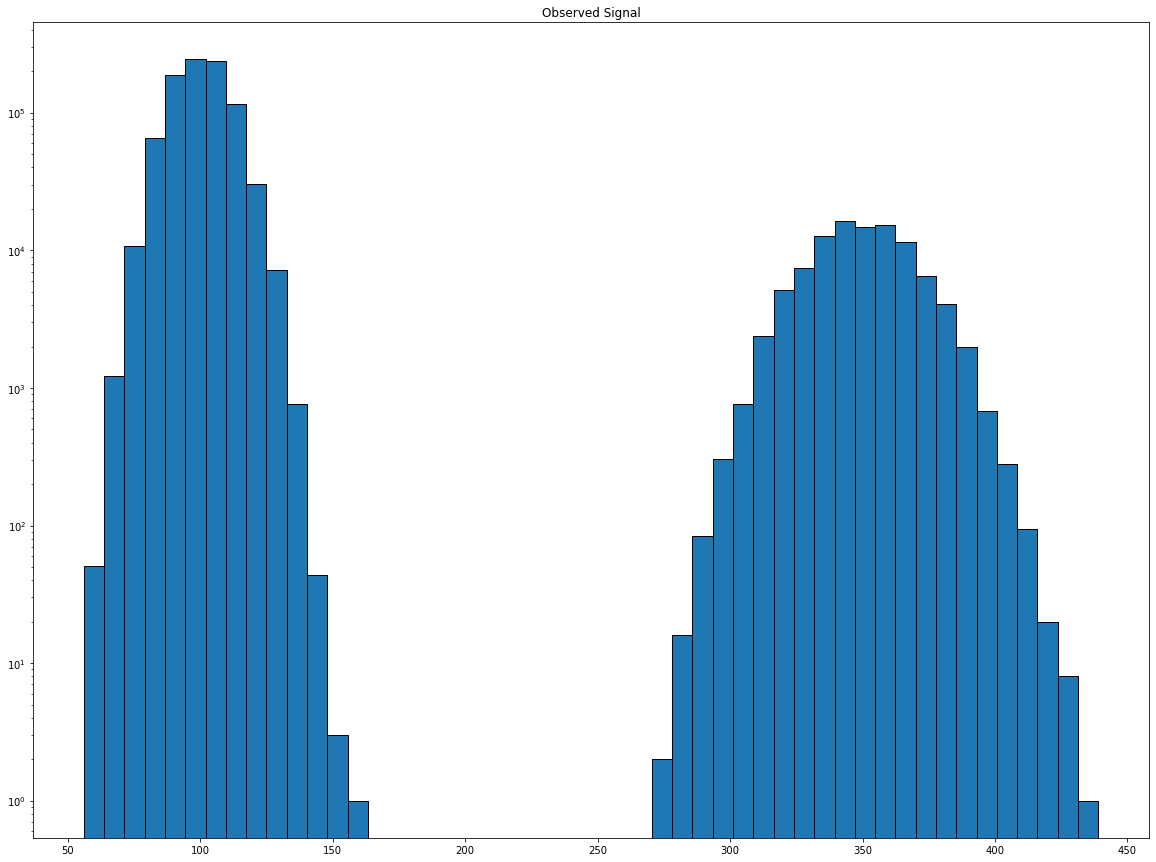

In [12]:
plt.hist(data, bins = 50, edgecolor='black')
plt.title("Observed Signal")
plt.yscale('log')
plt.show()

### b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?

My observed signal is definitely biased. The mean of our observed values is around 350, which is greater than our original injected signal mean of about 250. This is most likely because our data is equal to our background plus the signal, which is around 100 + 250 = 350. Our observed signal shape is still Poisson however the signal looks Guassian, so it does seem symmetric.

## Problem 3

### Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5σ (30σ or more). You will want to follow the work you did for Homework 5 very closely.

### a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data

In [18]:
inj_signal = stats.uniform.rvs(0, 501, 1000000)
data = bkgd + inj_signal

''

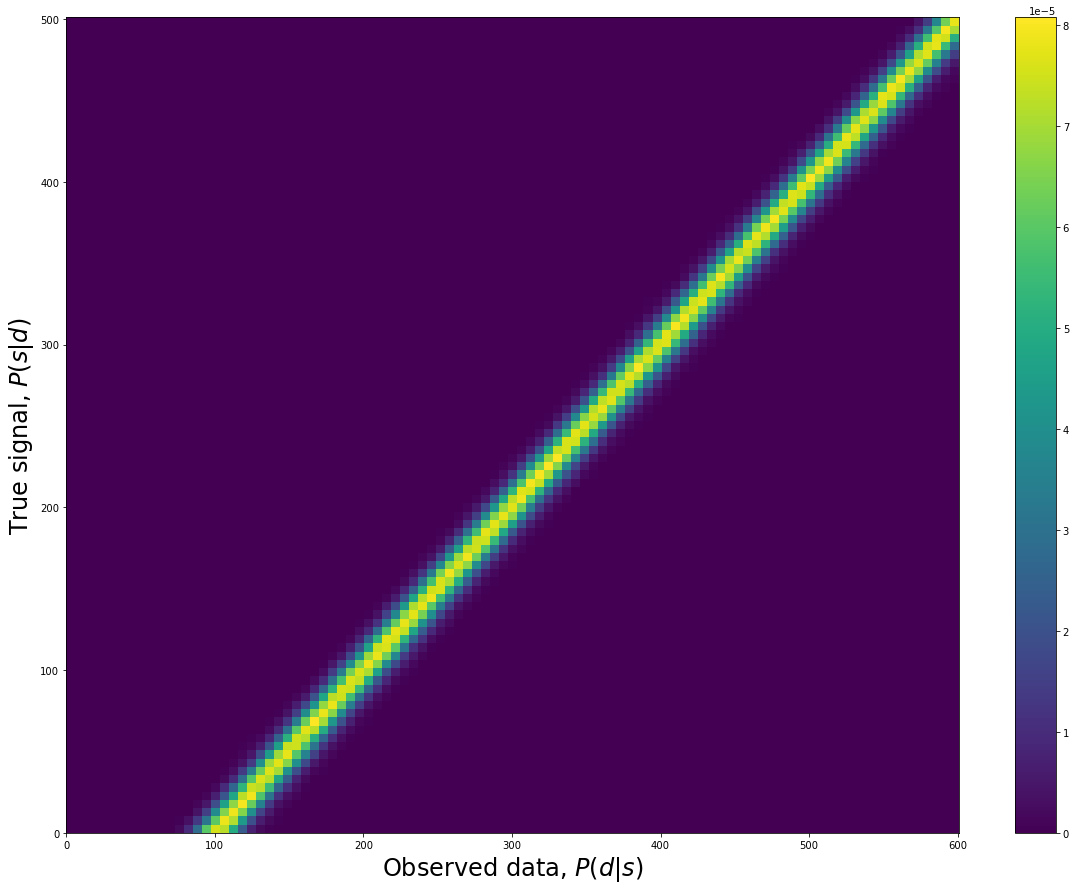

In [30]:
#plt.hist2d(data, inj_signal, bins=50)

signaledges = np.linspace(0,501,100)
dataedges = np.linspace(0,601,100)

Psd, temp, temp2 = np.histogram2d(data, inj_signal, bins=[dataedges,signaledges], density = True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T, shading='auto')
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

plt.colorbar()
;

### b) For the same injected signal power as in problem 2, show that you get the same answer.

In [31]:
signaledges

array([  0.        ,   5.06060606,  10.12121212,  15.18181818,
        20.24242424,  25.3030303 ,  30.36363636,  35.42424242,
        40.48484848,  45.54545455,  50.60606061,  55.66666667,
        60.72727273,  65.78787879,  70.84848485,  75.90909091,
        80.96969697,  86.03030303,  91.09090909,  96.15151515,
       101.21212121, 106.27272727, 111.33333333, 116.39393939,
       121.45454545, 126.51515152, 131.57575758, 136.63636364,
       141.6969697 , 146.75757576, 151.81818182, 156.87878788,
       161.93939394, 167.        , 172.06060606, 177.12121212,
       182.18181818, 187.24242424, 192.3030303 , 197.36363636,
       202.42424242, 207.48484848, 212.54545455, 217.60606061,
       222.66666667, 227.72727273, 232.78787879, 237.84848485,
       242.90909091, 247.96969697, 253.03030303, 258.09090909,
       263.15151515, 268.21212121, 273.27272727, 278.33333333,
       283.39393939, 288.45454545, 293.51515152, 298.57575758,
       303.63636364, 308.6969697 , 313.75757576, 318.81

In [41]:
bounds = (signaledges>247)*(signaledges<253)
idx = np.where(bounds)
idx

(array([49]),)

In [34]:
signaledges[49], signaledges[50]

(247.96969696969697, 253.03030303030303)

In [35]:
signal_idx = np.where((inj_signal > signaledges[49]) & (inj_signal < signaledges[50]))

Text(0.5, 0, 'Observed signal, $P(d|s)$')

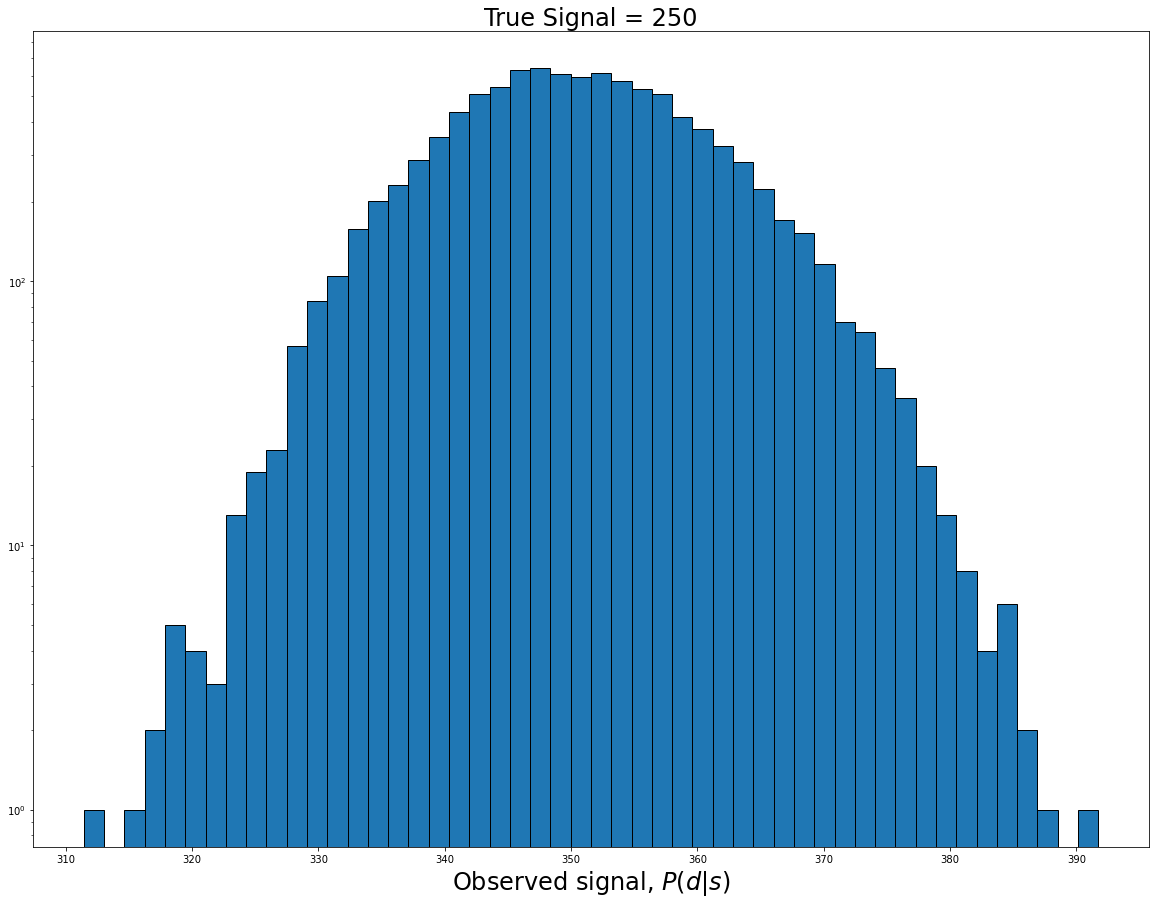

In [37]:
plt.hist(data[signal_idx], bins=50, edgecolor='black')
plt.yscale('log')
plt.title('True Signal = 250', fontsize=24)
plt.xlabel('Observed signal, $P(d|s)$', fontsize=24)

This is roughly consistent with the plot of the observed signal in 2a. There are some slight differences on the x-axis

### c) Now reverse the problem, select an observed data value (pick something quite a bit stronger than 5σ) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.

In [39]:
new_signal = 400

In [40]:
bounds2 = (signaledges > 399)*(signaledges < 404)
idx2 = np.where(bounds2)
idx2

(array([79]),)

In [42]:
dataedges[79], dataedges[80]

(479.5858585858586, 485.6565656565657)

In [44]:
data_idx = np.where((data > dataedges[79]) & (data < dataedges[80]))

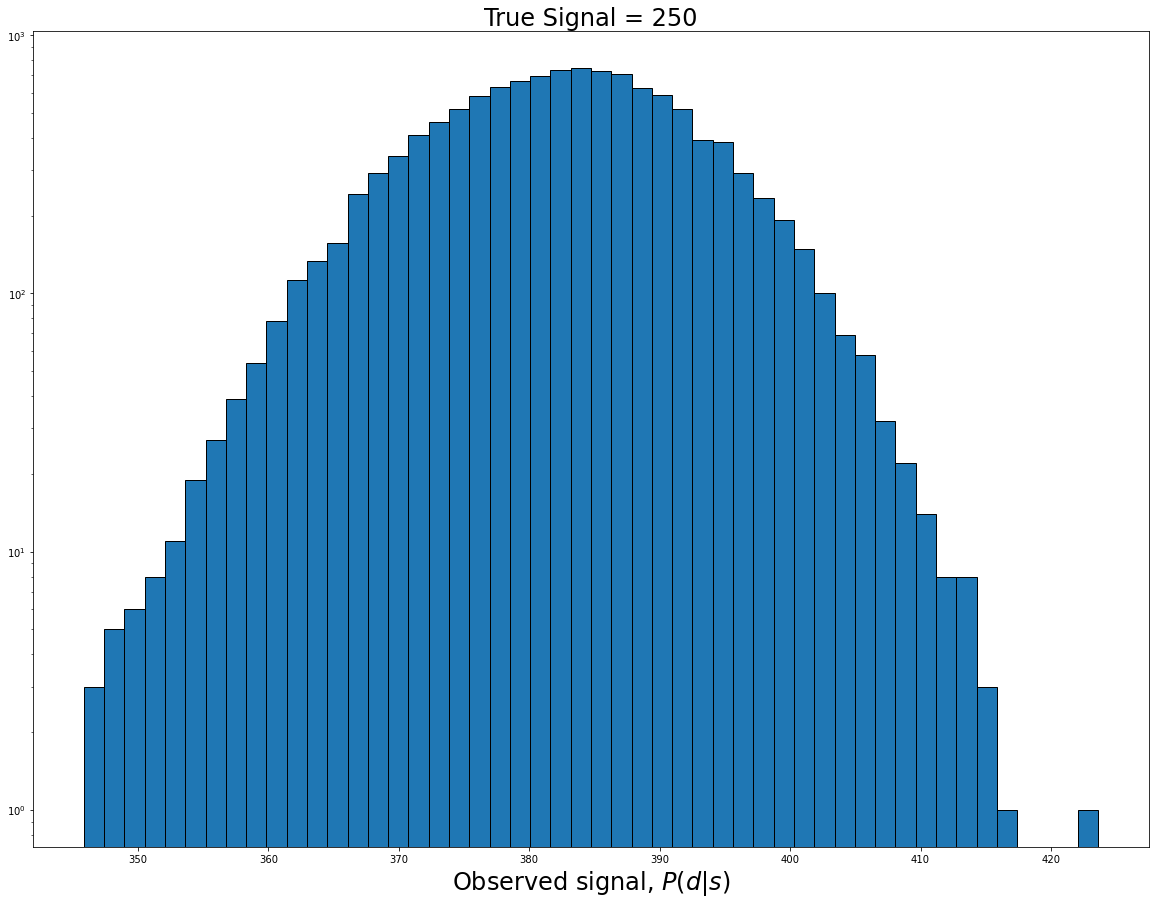

In [46]:
plt.hist(inj_signal[data_idx], bins=50, edgecolor='black')
plt.yscale('log')
plt.title('True Signal = 250', fontsize=24)
plt.xlabel('Observed signal, $P(d|s)$', fontsize=24)
plt.show()

This plot shows the distribution of the true signals given an observed signal. It is also consistent with the previous plot.

### d) For your observed signal, what is the 1σ uncertainty on the true signal strength?

In [56]:
mean = np.mean(inj_signal[data_idx])
one_sigma_max = 0.68
one_sigma_min = 1 - 0.68

upper_limit = stats.poisson.isf(one_sigma_min, mean)
lower_limit = stats.poisson.isf(one_sigma_max, mean)

In [60]:
mean, upper_limit, lower_limit

(382.5611144468111, 392.0, 373.0)

In [59]:
upper_limit - mean, mean - lower_limit

(9.438885553188925, 9.561114446811075)

So the $1\sigma$ uncertainty is $382.6 (+ 9.44, -9.56) $

### e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?



So the value in d shows the mean or an expected value of the true signal given an observed signal of 250 with 1$\sigma$ uncertainty. While our uncertainty is not exactly symmetrical it is extremely close to being symmetric.